# Analyse des accidents de véhicules sur le territoire français

Selon les informations du descriptif, les données sur la qualification des bléssés ont changés en 2018. On procedera à l'analyse sur les années 2018 à 2022 pour les informations bléssés. Et sur tout la durée pour la dangerosité. 

Les données se trouvent sur la page suivante : https://www.data.gouv.fr/fr/datasets/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2022/

### Vocabulaire : 
**Accident corporel**  : un accident survenu sur une voie ouverte à la circulation publique, 
impliquant au moins un véhicule et ayant fait au moins une victime ayant nécessité des soins

In [153]:
import sys
import missingno as msno
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import geopandas as gpd
import hvplot.pandas
import holoviews as hv


## Importation des données 

In [154]:
df_2019 = pd.read_csv("./data/2019.csv", sep= ';', low_memory = False)
df_caractéristique_2019 = pd.read_csv("./data/caracteristiques-2019.csv", sep= ';', low_memory = False, encoding = 'latin')
df_lieux_2019 = pd.read_csv("./data/lieux-2019.csv", sep= ';', low_memory = False)
df_usagers_2019 = pd.read_csv("./data/usagers-2019.csv", sep= ';', low_memory = False)
df_vehicules_2019 = pd.read_csv("./data/vehicules-2019.csv", sep= ';', low_memory = False)

## Découverte des différents jeux de données

In [155]:
df_caractéristique_2019.describe()

,Num_Acc,jour,mois,an,lum,agg,int,atm,col
count,5.884000e+04,58840.000000,58840.000000,58840.0,58840.000000,58840.000000,58840.000000,58840.000000,58840.000000
mean,2.019000e+11,15.683396,6.687542,2019.0,1.944867,1.645887,2.025357,1.617794,4.165058
std,1.698579e+04,8.719610,3.387344,0.0,1.504409,0.478248,1.997756,1.677988,1.954030
min,2.019000e+11,1.000000,1.000000,2019.0,1.000000,1.000000,1.000000,-1.000000,-1.000000
25%,2.019000e+11,8.000000,4.000000,2019.0,1.000000,1.000000,1.000000,1.000000,3.000000
50%,2.019000e+11,16.000000,7.000000,2019.0,1.000000,2.000000,1.000000,1.000000,3.000000
75%,2.019000e+11,23.000000,10.000000,2019.0,3.000000,2.000000,2.000000,1.000000,6.000000
max,2.019001e+11,31.000000,12.000000,2019.0,5.000000,2.000000,9.000000,9.000000,7.000000


In [156]:
df_caractéristique_2019

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,201900000001,30,11,2019,01:30,4,93,93053,1,1,1,2,AUTOROUTE A3,"48,8962100","2,4701200"
1,201900000002,30,11,2019,02:50,3,93,93066,1,1,1,6,AUTOROUTE A1,"48,9307000","2,3688000"
2,201900000003,28,11,2019,15:15,1,92,92036,1,1,1,4,AUTOROUTE A86,"48,9358718","2,3191744"
3,201900000004,30,11,2019,20:20,5,94,94069,1,1,1,4,A4,"48,8173295","2,4281502"
4,201900000005,30,11,2019,04:00,3,94,94028,1,1,1,2,A86 INT,"48,7763620","2,4332540"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58835,201900058836,30,11,2019,09:00,1,69,69288,1,1,5,2,A43 13.029 A 15.971,"45,6666600","5,0561200"
58836,201900058837,27,11,2019,07:50,1,67,67482,1,1,8,4,Autoroute A.35,"48,5769000","7,7269000"
58837,201900058838,30,11,2019,02:41,4,94,94021,1,1,1,6,AUTOROUTE A6A,"48,7717000","2,3457600"
58838,201900058839,30,11,2019,15:20,1,78,78640,1,1,1,7,A86 EXT,"48,7772890","2,2237590"


In [157]:
df_2019

,Id_accident,Lettre Conventionnelle Véhicule,Année,Lieu Admin Actuel - Territoire Nom,Type Accident - Libellé,CNIT,Catégorie véhicule,Age véhicule
0,63 387 461,A,2019,Métropole,Accident Léger,N10MCDCTPV62189,VU,3.0
1,63 387 461,B,2019,Métropole,Accident Léger,M10JT0VP015D744,VU,2.0
2,63 387 462,A,2019,Métropole,Accident grave non mortel,JS1CJ2251001004,Moto lourde,10.0
3,63 387 463,A,2019,Métropole,Accident Léger,VF7FC8HZB273438,VT,14.0
4,63 387 464,A,2019,Métropole,Accident Léger,M10NSSVP035L180,VT,1.0
...,...,...,...,...,...,...,...,...
94669,63 482 509,B,2019,Métropole,Accident Léger,MCT1002BN510,VT,18.0
94670,63 482 509,C,2019,Métropole,Accident Léger,M10DACVP001Y368,VT,0.0
94671,63 482 510,A,2019,Métropole,Accident Léger,MCT1012TR301,VT,11.0
94672,63 482 511,A,2019,Métropole,Accident Léger,NaN,PL,6.0


In [158]:
df_vehicules_2019

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
0,201900000001,138 306 524,B01,2,7,0,2,5,23,1,NaN
1,201900000001,138 306 525,A01,2,17,1,0,3,11,1,NaN
2,201900000002,138 306 523,A01,1,7,4,0,1,0,1,NaN
3,201900000003,138 306 520,A01,1,7,0,2,1,2,1,NaN
4,201900000003,138 306 521,B01,1,7,1,0,4,2,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
100705,201900058837,137 982 135,C01,1,7,0,2,1,2,1,NaN
100706,201900058838,137 982 132,A01,2,7,3,0,1,21,0,NaN
100707,201900058839,137 982 131,A01,2,33,0,0,7,1,1,NaN
100708,201900058840,137 982 129,B01,1,10,0,2,4,0,2,NaN


In [159]:
df_lieux_2019

,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,201900000001,1,3,0.0,NaN,3,10,0,1,6,900,2,NaN,NaN,1,2,1,70
1,201900000002,1,1,0.0,NaN,1,2,0,4,3,845,2,NaN,NaN,1,0,1,70
2,201900000003,1,86,0.0,NaN,3,8,0,1,10,500,3,NaN,NaN,1,0,1,90
3,201900000004,1,4,0.0,NaN,3,5,0,1,2,299,1,NaN,NaN,1,0,1,90
4,201900000005,1,86,0.0,INT,1,3,0,1,41,0,3,NaN,NaN,1,2,1,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58835,201900058836,1,43,0.0,NaN,1,3,0,1,15,500,1,NaN,NaN,2,3,1,130
58836,201900058837,1,35,0.0,NaN,1,2,0,1,303,282,1,NaN,NaN,2,0,1,90
58837,201900058838,1,6,0.0,A,3,3,0,1,5,199,1,NaN,NaN,1,0,1,90
58838,201900058839,1,86,0.0,NaN,1,1,0,1,59,99,3,NaN,NaN,1,0,1,50


In [160]:
df_usagers_2019

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,201900000001,138 306 524,B01,2,2,4,2,2002,0,1,0,-1,-1,-1,-1
1,201900000001,138 306 524,B01,1,1,4,2,1993,5,1,0,-1,-1,-1,-1
2,201900000001,138 306 525,A01,1,1,1,1,1959,0,1,0,-1,-1,-1,-1
3,201900000002,138 306 523,A01,1,1,4,2,1994,0,1,0,-1,-1,-1,-1
4,201900000003,138 306 520,A01,1,1,1,1,1996,0,1,0,-1,-1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132972,201900058837,137 982 135,C01,1,1,4,2,1988,1,1,0,-1,-1,-1,-1
132973,201900058838,137 982 132,A01,1,1,4,1,1998,9,1,0,-1,-1,-1,-1
132974,201900058839,137 982 131,A01,1,1,3,1,1979,0,2,0,-1,-1,-1,-1
132975,201900058840,137 982 129,B01,1,1,4,1,1974,0,1,0,-1,-1,0,-1


La feature qui identifie un accident mortel est **grav**.

L'usager est dénommé par **catu**.

Afin d'eviter les valeurs nulles, l'analyse sera séparé en deux groupes : 
- un dataset d'accidents implicant les piétons sera proposé
- un autre impliquant uniquement les véhicules entres eux

## Les problématiques sont les suivantes : 

Je travailles pour le ministère de l'intérieur section sécurité routière. Les points a analysés sont les suivants : 


    __L'evolution des accidents de la routes selon les départements et les années. 
 
 
## A quelles proportions les -10 ans sont-ils en danger sur les routes ? 
         __L'age des usagers tués ou bléssés dans les accidents des 5-10 dernières années.
         __Trajet le plus accidentogène pour la tranche 0-10 ans
         __Dispositif enfant utilisé, airbag activé ou non.
         __Quelle place est la plus mortelle pour un enfant si dispositif présent?
 
 


Pour commencer regroupons les données 2019 pour identifier les premieres features  puis nous ajouterons les autres années disponibles

In [161]:
df = df_caractéristique_2019.merge(df_lieux_2019).merge(df_vehicules_2019).merge(df_usagers_2019)

In [162]:
df

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,...,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,201900000001,30,11,2019,01:30,4,93,93053,1,1,...,4,2,2002,0,1,0,-1,-1,-1,-1
1,201900000001,30,11,2019,01:30,4,93,93053,1,1,...,4,2,1993,5,1,0,-1,-1,-1,-1
2,201900000001,30,11,2019,01:30,4,93,93053,1,1,...,1,1,1959,0,1,0,-1,-1,-1,-1
3,201900000002,30,11,2019,02:50,3,93,93066,1,1,...,4,2,1994,0,1,0,-1,-1,-1,-1
4,201900000003,28,11,2019,15:15,1,92,92036,1,1,...,1,1,1996,0,1,0,-1,-1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132972,201900058837,27,11,2019,07:50,1,67,67482,1,1,...,4,2,1988,1,1,0,-1,-1,-1,-1
132973,201900058838,30,11,2019,02:41,4,94,94021,1,1,...,4,1,1998,9,1,0,-1,-1,-1,-1
132974,201900058839,30,11,2019,15:20,1,78,78640,1,1,...,3,1,1979,0,2,0,-1,-1,-1,-1
132975,201900058840,29,11,2019,20:50,3,92,92047,1,1,...,4,1,1974,0,1,0,-1,-1,0,-1


<Axes: >

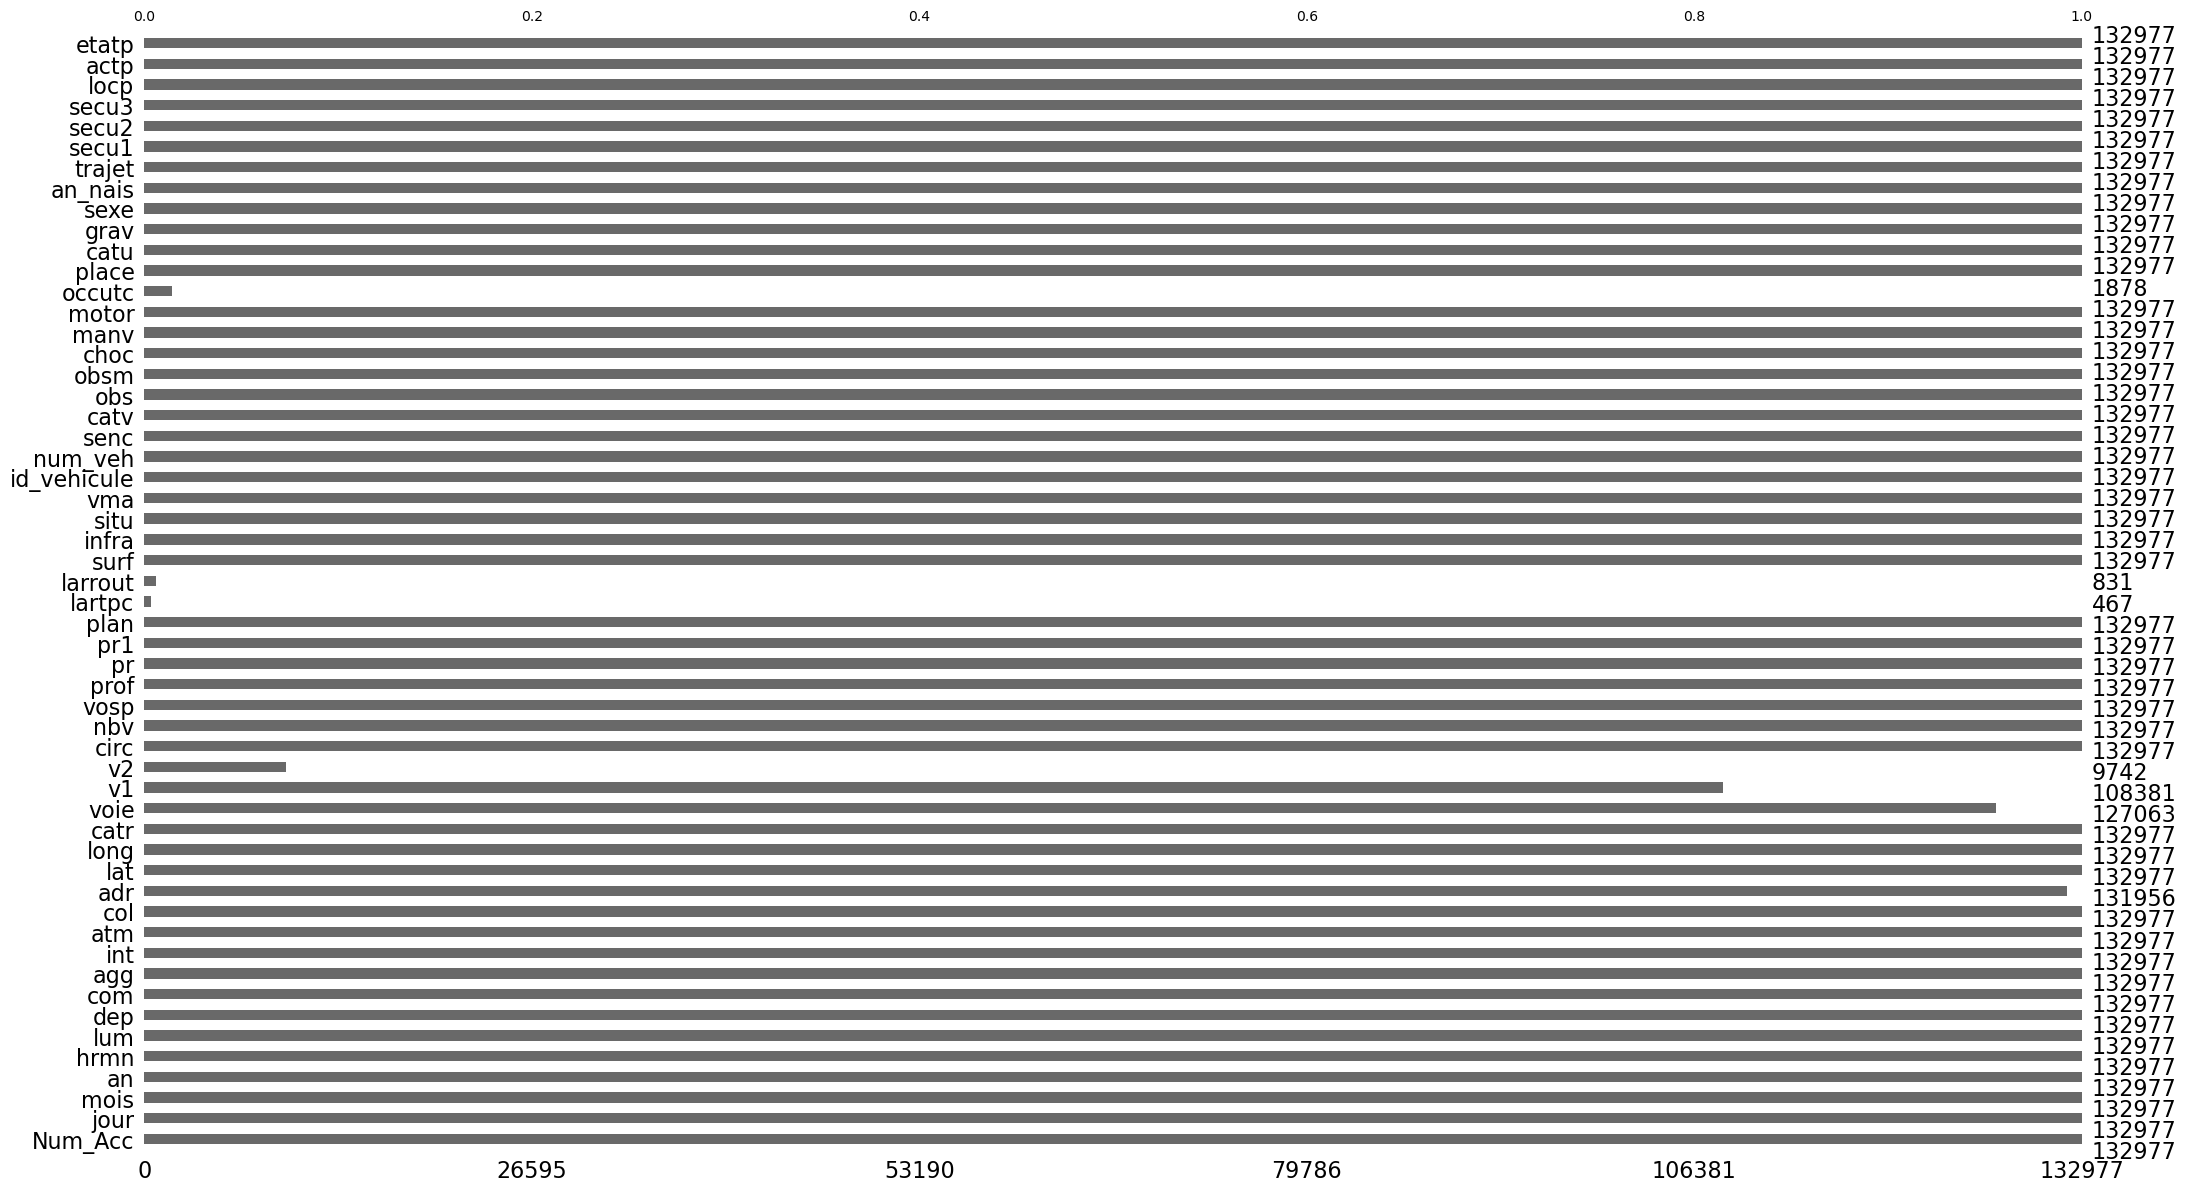

In [163]:
msno.bar(df)

In [164]:
df_usagers_2019

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,201900000001,138 306 524,B01,2,2,4,2,2002,0,1,0,-1,-1,-1,-1
1,201900000001,138 306 524,B01,1,1,4,2,1993,5,1,0,-1,-1,-1,-1
2,201900000001,138 306 525,A01,1,1,1,1,1959,0,1,0,-1,-1,-1,-1
3,201900000002,138 306 523,A01,1,1,4,2,1994,0,1,0,-1,-1,-1,-1
4,201900000003,138 306 520,A01,1,1,1,1,1996,0,1,0,-1,-1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132972,201900058837,137 982 135,C01,1,1,4,2,1988,1,1,0,-1,-1,-1,-1
132973,201900058838,137 982 132,A01,1,1,4,1,1998,9,1,0,-1,-1,-1,-1
132974,201900058839,137 982 131,A01,1,1,3,1,1979,0,2,0,-1,-1,-1,-1
132975,201900058840,137 982 129,B01,1,1,4,1,1974,0,1,0,-1,-1,0,-1


In [165]:
cols_to_drop = [ "larrout", "lartpc", "vosp", "voie", "occutc", "v1", "v2", "prof", "pr", "pr1", "num_veh", "senc"]
df_clean_2019 = df.drop(columns = cols_to_drop)

Nous avons la trame de ce qu'il faut réaliser pour obtenir un dataset pour chaque année.  
Repartons ceci pour les années 2020, 2021, 2022. 

# Feature engineering

## On souhaite prédire la gravité des blessures pour un mineur de 0 à 12 ans


In [166]:
def import_clean_select_children(annee, separateur):
    # Chargement des fichiers CSV pour l'année donnée
    df_caracteristiques = pd.read_csv(f"./data/caracteristiques-{annee}.csv", sep= separateur, low_memory=False, encoding='latin')
    df_lieux = pd.read_csv(f"./data/lieux-{annee}.csv", sep= separateur, low_memory=False)
    df_usagers = pd.read_csv(f"./data/usagers-{annee}.csv", sep= separateur, low_memory=False)
    df_vehicules = pd.read_csv(f"./data/vehicules-{annee}.csv", sep= separateur, low_memory=False)
    
    # Fusion des DataFrames
    df = df_caracteristiques.merge(df_lieux) \
                            .merge(df_vehicules) \
                            .merge(df_usagers)
    
    # Colonnes à supprimer
    cols_to_drop = ["larrout", "lartpc", "vosp", "voie","occutc", "v1", "v2", "prof", "pr", "pr1", "num_veh", "senc"]
    
    # Nettoyage des colonnes inutiles
    df_clean = df.drop(columns=cols_to_drop)

    # Calcul de l'âge (en supposant que la colonne 'an_nais' est l'année de naissance)
    df_clean['age'] = annee - df_clean['an_nais']
    
    # Filtrer les enfants (âgés de 0 à 12 ans)
    df_enfants = df_clean[df_clean['age'].between(0, 12)]
    
    return df_enfants

### Importation pour les données de 2019 à 2022

In [183]:
# Liste des années à traiter
annees = [2019, 2020, 2021, 2022]

# Importer et nettoyer les données de chaque année, puis les concaténer
df_total_enfants = pd.concat([import_clean_select_children(annee, ';') for annee in annees], ignore_index=True)


On supprime id_usager qui apparaît en 2022

In [184]:
df_total_enfants = df_total_enfants.drop(columns= "id_usager")

In [185]:
df_total_enfants = df_total_enfants.drop(columns= "adr")

In [186]:
df_total_enfants = df_total_enfants.drop(columns= 'id_vehicule')

<Axes: >

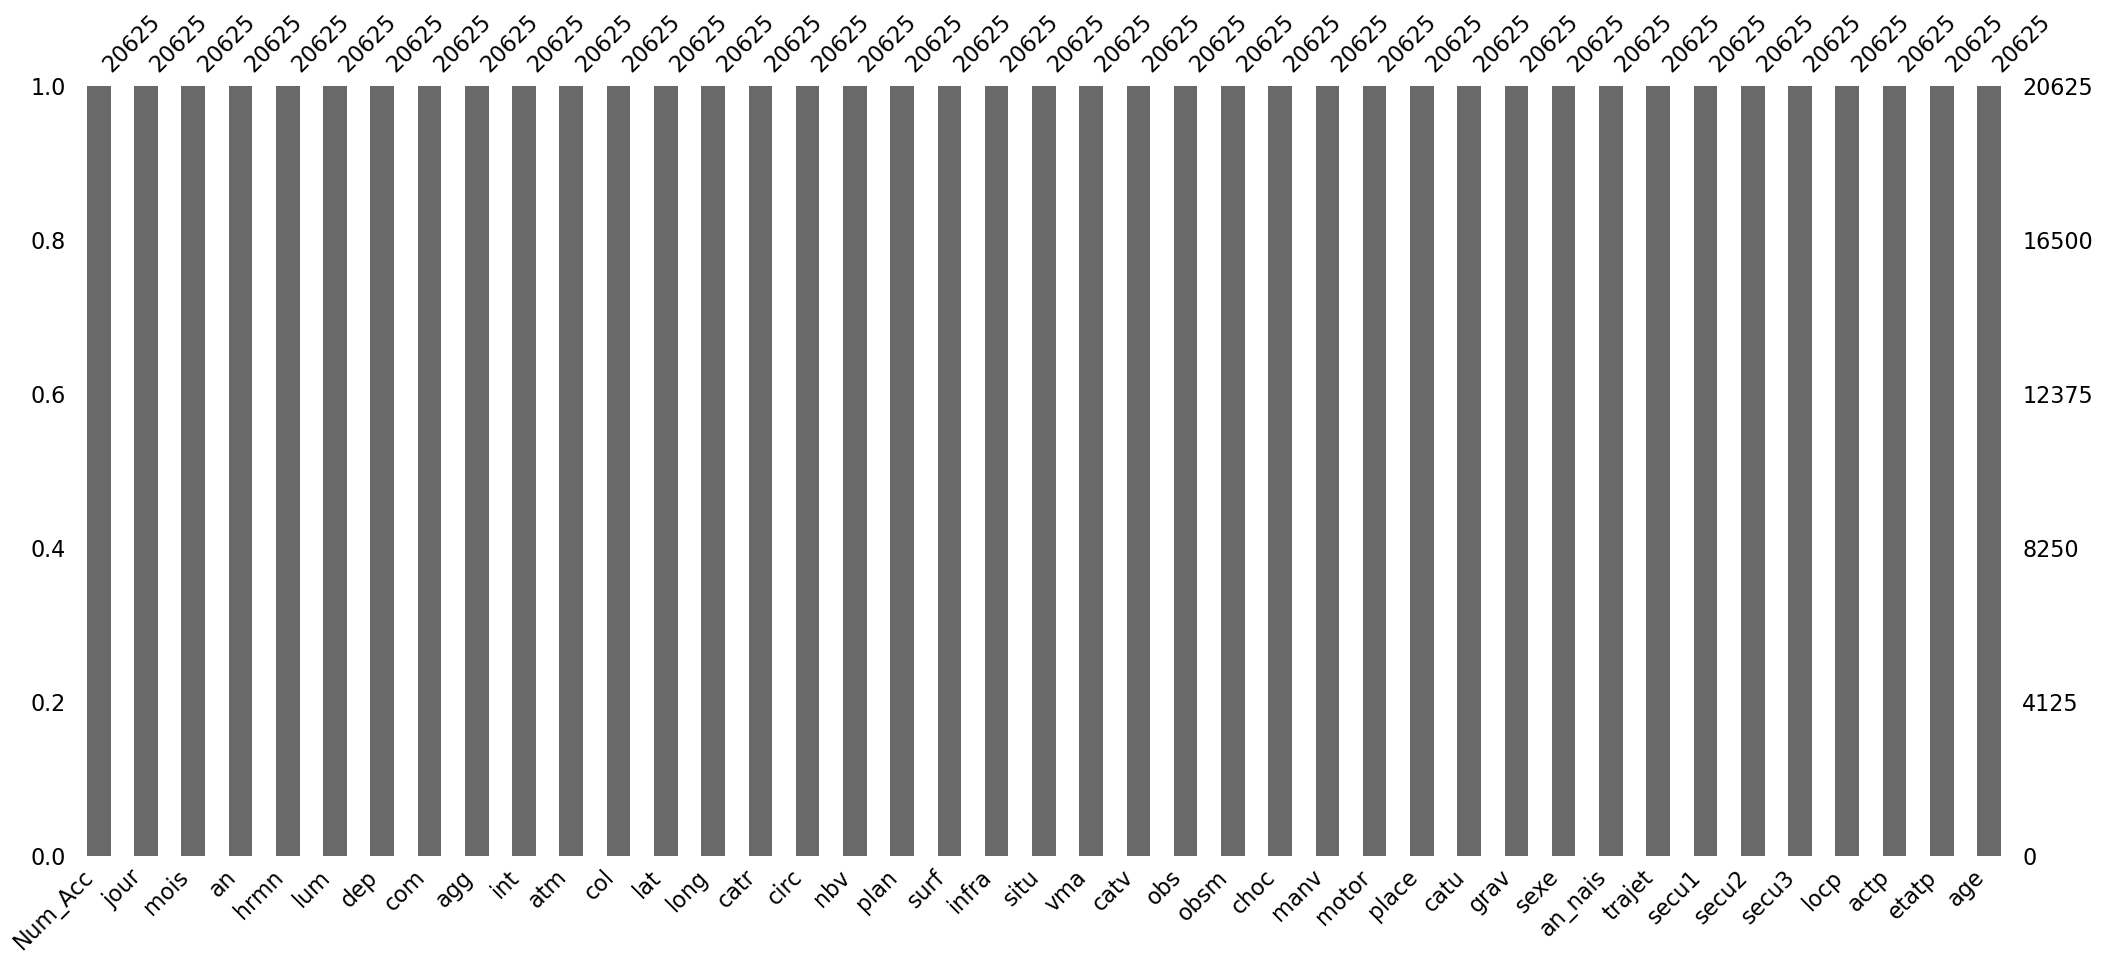

In [187]:
msno.bar(df_total_enfants)

In [188]:
# Convertir les coordonnées
df_total_enfants['lat'] = df_total_enfants['lat'].str.replace(',', '.').astype(float)
df_total_enfants['long'] = df_total_enfants['long'].str.replace(',', '.').astype(float)

Le dispositif de sécurité **secu1** ou **secu2** ou **secu3** = 3 : dispositif enfants ET 1 Ceinture ou 0 Aucun équipement
sera décisif

In [189]:
df_total_enfants["secu1"].value_counts()

secu1
 1    9057
 0    4616
 3    3142
 8    2912
 2     770
 9      98
-1      20
 4       5
 5       4
 6       1
Name: count, dtype: int64

In [190]:
df_total_enfants["secu2"].value_counts()

secu2
-1    10422
 0     7107
 8     1846
 3      552
 1      212
 6      144
 9      144
 5       97
 4       78
 2       14
 7        9
Name: count, dtype: int64

In [191]:
df_total_enfants["secu3"].value_counts()

secu3
-1    20517
 0       76
 9       12
 8        8
 3        7
 5        3
 4        2
Name: count, dtype: int64

#### Création des variables dispositif enfant et ceinture de sécurité pour mieux les identifier

In [192]:
df_total_enfants['dispositif_enfant'] = df_total_enfants[['secu1', 'secu2', 'secu3']].apply(lambda x: 1 if 3 in x.values else 0, axis=1)

In [193]:
df_total_enfants['ceinture_securite'] = df_total_enfants[['secu1', 'secu2', 'secu3']].apply(lambda x: 1 if 1 in x.values else 0, axis=1)

In [194]:
df_total_enfants= df_total_enfants.drop(columns=["secu1","secu2", "secu3"])

#### Création de la variable decès pour identifier les accidents mortels

In [195]:
df_total_enfants['deces'] = df_total_enfants['grav'] == 2

#### Variable temporelle

In [196]:
df_total_enfants['hrmn'] = pd.to_datetime(df_total_enfants["hrmn"], format='%H:%M')
#Extraction de l'heure
df_total_enfants['heure'] = df_total_enfants['hrmn'].dt.hour
#Extraction des minutes
df_total_enfants['minute'] = df_total_enfants['hrmn'].dt.minute

In [197]:
# Création d'une variable "période de la journée" (matin, après-midi, soir, nuit)
def categoriser_periode(h):
    if 6 <= h < 10:
        return 'Heure de pointe matin'
    elif 10 <= h < 13:
        return 'Matin'
    elif 13 <= h < 16:
        return 'Après-midi'
    elif 16 <= h < 19:
        return 'Heure de pointe soir'
    else:
        return 'Nuit'

df_total_enfants['periode_journee'] = df_total_enfants['heure'].apply(categoriser_periode)

In [198]:
df_total_enfants.columns

Index(['Num_Acc', 'jour', 'mois', 'an', 'hrmn', 'lum', 'dep', 'com', 'agg',
       'int', 'atm', 'col', 'lat', 'long', 'catr', 'circ', 'nbv', 'plan',
       'surf', 'infra', 'situ', 'vma', 'catv', 'obs', 'obsm', 'choc', 'manv',
       'motor', 'place', 'catu', 'grav', 'sexe', 'an_nais', 'trajet', 'locp',
       'actp', 'etatp', 'age', 'dispositif_enfant', 'ceinture_securite',
       'deces', 'heure', 'minute', 'periode_journee'],
      dtype='object')

In [199]:
df_total_enfants.to_csv('./data/data_enfants.csv')

## Exploratory Data Analysis (EDA) -12 ans
*L'Objectif est de mieux comprendre les données et d'identifier les relations potentielles avant les prédictions* 
### 1. Analyse des variables catégoriques 
- Tendances temporelle : Y a-t-il plus d'accidents à certaines heures ou certains mois ? **jour** , **mois** ( septembre, juillet, août, décembre, janvier)
- Y a-t-il plus d'accidents la nuit ou le jour ?
- La lumisosité est-elle en facteur aggravant ? **lum**
- La météo est-elle un facteur ? **atm**
- répartition en fonction de la gravité. 

### 2. Analyse des variables géographique et environnementales
- Localisation sur carte
- Comparatif par région | département - DOM TOM

### 3. Analyse croisées selon le type de trajet
- Répartition selon le type de trajet et le port de la ceinture
- Répartition selon le type de trajet et l'utilisation d'un siège auto
- Analyse de la corrélation entre gravité et dispositif de sécurité.

### 4. Analyse selon la mortalité
- Qui est le plus souvent impliqué dans les accidents mortels? 
- Si déces quels sont les facteurs prédominant

### 5. Analyse de corrélation

## 1. Analyse des variables catégoriques 

### Tendances temporelles

In [124]:
df = df_total_enfants.copy()

In [125]:
df.columns

Index(['Num_Acc', 'jour', 'mois', 'an', 'hrmn', 'lum', 'dep', 'com', 'agg',
       'int', 'atm', 'col', 'adr', 'lat', 'long', 'catr', 'circ', 'nbv',
       'plan', 'surf', 'infra', 'situ', 'vma', 'id_vehicule', 'catv', 'obs',
       'obsm', 'choc', 'manv', 'motor', 'place', 'catu', 'grav', 'sexe',
       'an_nais', 'trajet', 'locp', 'actp', 'etatp', 'age',
       'dispositif_enfant', 'ceinture_securite', 'deces', 'heure', 'minute',
       'periode_journee'],
      dtype='object')

In [126]:
# Compter le nombre d'accidents par année
accidents_par_annee = df.groupby(['an','mois'])['Num_Acc'].count().reset_index()
accidents_par_annee.columns = ['Année', 'Mois', 'Nombre d\'accidents']

# Créer une colonne combinée pour l'affichage
accidents_par_annee['Année-Mois'] = accidents_par_annee['Année'].astype(str) + '-' + accidents_par_annee['Mois'].astype(str).str.zfill(2)

# Création du graphique en ligne avec régression linéaire
fig_années = px.line(
    accidents_par_annee,
    x='Année-Mois',
    y='Nombre d\'accidents',
    title='Nombre d\'accidents par Année avec Régression Linéaire',
    labels={'Année-Mois': 'Année-Mois', 'Nombre d\'accidents': 'Nombre d\'accidents'}
)

# Afficher le graphique
fig_années.show()


In [132]:
df['year'] = df['an'].astype(int)
df['month'] = df['mois'].astype(int)
df['day'] = df['jour'].astype(int)

df['Date'] = pd.to_datetime(df[['year', 'month', 'day']], format='%Y-%m-%d')

# Créer une colonne 'Date ISO' où l'année est toujours 2022
df['Date_ISO'] = pd.to_datetime(
    df[['month', 'day']].assign(year=2022), errors='coerce'
)

# Vérifier que la colonne a été correctement créée
print(df[['Date_ISO', 'an', 'mois', 'jour', 'Date']].head())

    Date_ISO    an  mois  jour       Date
0 2022-11-29  2019    11    29 2019-11-29
1 2022-11-29  2019    11    29 2019-11-29
2 2022-11-28  2019    11    28 2019-11-28
3 2022-11-27  2019    11    27 2019-11-27
4 2022-09-20  2019     9    20 2019-09-20


In [137]:
accidents_par_date_iso

,Date_ISO,an,Date,Num_Acc
0,2022-01-01,2019,2019-01-01,18
1,2022-01-01,2020,2020-01-01,23
2,2022-01-01,2021,2021-01-01,13
3,2022-01-01,2022,2022-01-01,7
4,2022-01-02,2019,2019-01-02,7
...,...,...,...,...
1440,2022-12-30,2022,2022-12-30,14
1441,2022-12-31,2019,2019-12-31,11
1442,2022-12-31,2020,2020-12-31,15
1443,2022-12-31,2021,2021-12-31,9


In [152]:
# Grouper les données par Date_ISO et année d'origine
accidents_par_date_iso = df.groupby(['Date_ISO', 'an', 'Date'])['Num_Acc'].count().reset_index()

# Renommer les colonnes pour plus de clarté
accidents_par_date_iso.columns = ['Date_ISO', 'Annee', 'Date', 'Nombre_Accidents']


# Tracer le graphique avec Plotly
fig_iso = px.line(
    accidents_par_date_iso,
    x='Date_ISO',
    y='Nombre_Accidents',
    color='Annee',
    title='Nombre d\'accidents par mois avec comparaison entre années',
    labels={'Date': 'Mois', 'Nombre_Accidents': 'Nombre d\'accidents', 'Annee': 'Année'},
    line_shape='linear'
)
fig_iso.update_layout(
    xaxis=dict(
        tickformat="%b",
    ),
    bargap=0.2
)

# Afficher le graphique
fig_iso.show()

In [ ]:
fig_mois_annee = px.line(
    accidents_par_annee,
    x='Date',
    y='Nombre d\'accidents',
    color='Année',
    title='Nombre d\'accidents par Mois avec Comparaison entre Années',
    labels={'Date': 'Date', 'Nombre d\'accidents': 'Nombre d\'accidents', 'Année': 'Année'},
    line_shape='linear',  # Assurez-vous que la ligne est tracée correctement
    markers=True  # Ajoute des marqueurs pour chaque point de données
)

# Afficher le graphique
fig_mois_annee.show()

In [30]:
accidents_par_mois = df['mois'].value_counts().sort_index()

In [149]:
# Créer un diagramme en barres interactif avec Plotly
fig = px.bar(
    x=accidents_par_mois.index, 
    y=accidents_par_mois.values, 
    labels={'x': 'Mois', 'y': "Nombre d'accidents"},
    title="Nombre d'accidents par mois",
    color=accidents_par_mois.values,  # Utiliser les couleurs
    color_continuous_scale= 'geyser'  # Appliquer les couleurs personnalisées
)

# Ajouter des personnalisations
fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ),
    bargap=0.2
)

# Afficher la figure
fig.show()

On observe un pic d'accident impliquant les enfants  pendant les mois d'été et en décembre

In [32]:
accidents_par_periode = df['periode_journee'].value_counts().sort_index()

In [33]:
# Créer un diagramme en barres interactif avec Plotly
fig = px.bar(
    x=accidents_par_periode.index, 
    y=accidents_par_periode.values, 
    labels={'x': 'Période la journée', 'y': "Nombre d'accidents"},
    title="Nombre d'accidents par mois",
    color=accidents_par_periode.values,  # Utiliser les couleurs
    color_continuous_scale= 'geyser'  # Appliquer les couleurs personnalisées
)
# Afficher la figure
fig.show()

Il y a 2 fois plus d'accidents impliquant des enfants lors de l'heure de pointe du soir 

In [34]:
accidents_par_meteo = df['atm'].value_counts().sort_index()

# Étiquettes des conditions atmosphériques
etiquettes_atm = [
    "Non renseigné", "Normale", "Pluie légère", "Pluie forte", 
    "Neige - grêle", "Brouillard - fumée", "Vent fort - tempête", 
    "Temps éblouissant", "Temps couvert", "Autre"
]

# Créer un diagramme en barres interactif avec Plotly
fig = px.bar(
    x=etiquettes_atm, 
    y=accidents_par_meteo.values, 
    log_y=True,
    labels={'x': 'Météo', 'y': "Nombre d'accidents"},
    title="Nombre d'accidents selon les conditions atmosphériques",
    text=accidents_par_meteo.values,
    color=accidents_par_meteo.values,  # Utiliser les couleurs
    color_continuous_scale= 'geyser'  # Appliquer les couleurs personnalisées
)
# Afficher la figure
fig.show()

La majorité des accidents ont lieu dans des conditions normales

In [35]:
# Mapping des niveaux de gravité
grav_mapping = {
    1: 'Indemne',
    2: 'Décédé',
    3: 'Blessé hospitalisé',
    4: 'Blessé léger'
}
# Remplacer les valeurs numériques par les descriptions
df['grav_description'] = df['grav'].map(grav_mapping)

# Répartition avec les descriptions
repartition_gravite_desc = df['grav_description'].value_counts()

# Créer un diagramme circulaire pour la répartition selon la gravité
fig = px.pie(
    names=repartition_gravite_desc.index,  # Les niveaux de gravité
    values=repartition_gravite_desc.values,  # Le nombre d'accidents pour chaque gravité
    title="Répartition des accidents selon la gravité",
    labels={'names': 'Gravité'},
    color_discrete_sequence=px.colors.qualitative.Vivid
)

# Afficher le graphique
fig.show()


La plupart des accidents ont heureusement produit des bléssés léger chez les enfants. 
## 2. Analyse des variables géographique et environnementales
- Localisation sur carte
- Comparatif par région | département - DOM TOM
- en agglomération ou non 

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
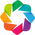

c:\Users\didik\anaconda3\Lib\site-packages\holoviews\core\util.py:1585: PanelDeprecationWarning:

'param_value_if_widget' is deprecated and will be removed in version 1.5, use 'transform_reference' instead.



:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (grav_description)

In [36]:
# Créer un GeoDataFrame
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.long, df.lat)
)

# Visualiser avec hvplot
map_plot = gdf.hvplot.points(
    geo=True,
    size=50,
    color='grav_description',  # Colonne pour la couleur des points
    tiles='OSM',
    hover_cols=['grav_description'],  # Colonnes à afficher dans le popup
    width=900,  # Largeur en pixels
    height=700, # Hauteur en pixels
    title="Carte des Accidents où des -12 ans sont impliqués selon la gravité"
)

# Afficher la carte
hv.extension('bokeh')  # Nécessaire pour l'affichage interactif avec Bokeh
map_plot


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
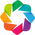

c:\Users\didik\anaconda3\Lib\site-packages\holoviews\core\util.py:1585: PanelDeprecationWarning:

'param_value_if_widget' is deprecated and will be removed in version 1.5, use 'transform_reference' instead.



:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (ceinture_description)

In [37]:
from holoviews import opts

mapping_ceinture ={1: "Ceinture mise", 0: "Ceinture non mise"}
df['ceinture_description'] = df['ceinture_securite'].map(mapping_ceinture)
# Créer un GeoDataFrame
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.long, df.lat)
)

# Visualiser avec hvplot
map_plot1 = gdf.hvplot.points(
    geo=True,
    size=50,  # Taille des points
    color='ceinture_description',  # Utilise la variable pour la couleur
    tiles='OSM',
    hover_cols=['ceinture_description']
).opts(
    width=900,  # Largeur en pixels
    height=700,  # Hauteur en pixels
    title="Carte des Accidents routiers impliquant des -12 ans selon le Port de la Ceinture de Sécurité",
)

# Afficher la carte avec la légende
hv.extension('bokeh')  # Nécessaire pour l'affichage interactif avec Bokeh
map_plot1


On remarque que le non port de la ceinture et plus fréquent en agglomération. LE long des axes autoroutiers les -12 ans portent la ceinture en général. 



In [38]:
df.ceinture_description.value_counts()

ceinture_description
Ceinture non mise    11359
Ceinture mise         9266
Name: count, dtype: int64

In [39]:
df.dispositif_enfant.value_counts()

dispositif_enfant
0    16942
1     3683
Name: count, dtype: int64

In [40]:
# Calculer la répartition des accidents selon la situation 'agg'
repartition_agg = df['agg'].value_counts()

# Mapper les codes de 'agg' à des descriptions plus lisibles
map_agg = {1: "Hors agglomération", 2: "En agglomération"}
df['agg_description'] = df['agg'].map(map_agg)
repartition_agg_desc = df['agg_description'].value_counts()


# Création du graphique en secteurs
fig_agg_pie = px.pie(
    names=repartition_agg_desc.index,
    values=repartition_agg_desc.values,
    labels={'names': 'Situation (Agglomération ou non)', 'values': 'Nombre d\'accidents'},
    title="Répartition des accidents selon la situation (Agglomération ou non)"
)

# Afficher le graphique
fig_agg_pie.show()




In [53]:
repartition_agg_gravité = pd.crosstab(df['agg_description'], df['grav_description'])

# Réinitialiser l'index pour avoir une colonne pour 'agg_description'
repartition_agg_gravité = repartition_agg_gravité.reset_index()

# Convertir en format long
repartition_long = repartition_agg_gravité.melt(id_vars='agg_description', 
                                                var_name='grav_description', 
                                                value_name='Nombre d\'accidents')

# Création du graphique en barres empilées
fig_grav_agg = px.bar(
    repartition_long,
    x='grav_description',
    y='Nombre d\'accidents',
    color='agg_description',
    title="Répartition de la gravité des accidents en fonction de la situation (Agglomération ou non)",
    labels={'agg_description': 'Situation (Agglomération ou non)', 'grav_description': 'Gravité'},
    barmode='stack',
    color_discrete_map={'Hors agglomération': 'blue', 'En agglomération': 'orange'}  # Choisir des couleurs distinctes
)

fig_grav_agg.show()


## 3. Analyses croisées selon le type de trajet 

In [43]:
# Comptage des accidents selon le type de véhicule 'trajet'

map_trajet = {-1 : "Non renseigné",0: "Non renseigné",1: "Domicile_travail",
              2: "Domicile_école",3:"Courses_achats",4:"Utilisation professionnelle",
              5: "Promenade_loisirs",9: "Autre"}
df["trajet_description"] = df["trajet"].map(map_trajet)

repartition_trajet = df['trajet_description'].value_counts()

map_dispositif = {0: "pas de siège auto", 1: "avec siege auto"}
df["dispositif_enfant_desc"] = df["dispositif_enfant"].map(map_dispositif)

# Création d'un tableau croisé pour compter les accidents selon le trajet et le dispositif enfant
repartition_trajet_dispositif = pd.crosstab(df['trajet_description'], df['dispositif_enfant_desc'])

# Création du graphique en barre avec Plotly
fig_traj = px.bar(
    x=repartition_trajet.index, 
    y=repartition_trajet.values, 
    labels={'x': 'Type de trajet', 'y': 'Nombre d\'accidents'},
    title="Répartition des accidents selon le type de trajet",
    color=repartition_trajet.values,  # Utiliser les couleurs
    color_continuous_scale= 'geyser'  # Appliquer les couleurs personnalisées
)

fig_traj.show()

# Création du graphique à barres groupées
fig = px.bar(
    repartition_trajet_dispositif, 
    x=repartition_trajet_dispositif.index, 
    y=repartition_trajet_dispositif.columns, 
    title="Répartition des accidents selon le type de trajet et le dispositif enfant",
    labels={'value': 'Nombre d\'accidents', 'index': 'Type de trajet', 'variable': 'Dispositif enfant'},
    barmode='group',  # Barres groupées
    text_auto=True  # Afficher les valeurs sur les barres
)

fig.show()

In [44]:
# Création d'un tableau croisé pour compter les accidents selon le trajet et le port de la ceinture
repartition_trajet_ceinture = pd.crosstab(df['trajet_description'], df['ceinture_description'])

import plotly.express as px

# Création du graphique à barres groupées pour le type de trajet et le port de la ceinture
fig = px.bar(
    repartition_trajet_ceinture, 
    x=repartition_trajet_ceinture.index,  # Type de trajet sur l'axe des X
    y=repartition_trajet_ceinture.columns,  # Port de la ceinture sur l'axe des Y

    title="Répartition des accidents selon le type de trajet et le port de la ceinture",
    labels={'value': 'Nombre d\'accidents', 'index': 'Type de trajet', 'variable': 'Port de la ceinture'},
    barmode='group',  # Barres groupées
    text_auto=True,  # Afficher les valeurs sur les barres
)

fig.show()

# Heatmap avec Plotly
fig_heatmap = px.imshow(
    repartition_trajet_ceinture,
    labels=dict(x="ceinture description", y="trajet_description", color="Nombre d'accidents"),
    title="Corrélation entre la gravité et le dispositif de sécurité",
    color_continuous_scale="geyser"
)

fig_heatmap.show()



 ### Corrélation entre gravité et dispositif de sécurité

In [45]:
df.columns

Index(['Num_Acc', 'jour', 'mois', 'an', 'hrmn', 'lum', 'dep', 'com', 'agg',
       'int', 'atm', 'col', 'adr', 'lat', 'long', 'catr', 'circ', 'nbv',
       'plan', 'surf', 'infra', 'situ', 'vma', 'id_vehicule', 'catv', 'obs',
       'obsm', 'choc', 'manv', 'motor', 'place', 'catu', 'grav', 'sexe',
       'an_nais', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp',
       'age', 'dispositif_enfant', 'ceinture_securite', 'deces', 'heure',
       'minute', 'periode_journee', 'grav_description', 'ceinture_description',
       'agg_description', 'trajet_description', 'dispositif_enfant_desc'],
      dtype='object')

In [46]:
# Créer un tableau croisé entre la gravité et le dispositif de sécurité
correlation_table = pd.crosstab(df['grav_description'], df['dispositif_enfant_desc'])

# Heatmap avec Plotly
fig_heatmap = px.imshow(
    correlation_table,
    labels=dict(x="Dispositif Enfant", y="Gravité", color="Nombre d'accidents"),
    title="Corrélation entre la gravité et le dispositif de sécurité",
    color_continuous_scale= "geyser"
)

fig_heatmap.show()

## 4. Analyse de la mortalité 

In [47]:
# Filtrer les données pour les accidents mortels (déces == 1)
accidents_mortels = df[df['deces'] == 1]

In [48]:
accidents_mortels.columns

Index(['Num_Acc', 'jour', 'mois', 'an', 'hrmn', 'lum', 'dep', 'com', 'agg',
       'int', 'atm', 'col', 'adr', 'lat', 'long', 'catr', 'circ', 'nbv',
       'plan', 'surf', 'infra', 'situ', 'vma', 'id_vehicule', 'catv', 'obs',
       'obsm', 'choc', 'manv', 'motor', 'place', 'catu', 'grav', 'sexe',
       'an_nais', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp',
       'age', 'dispositif_enfant', 'ceinture_securite', 'deces', 'heure',
       'minute', 'periode_journee', 'grav_description', 'ceinture_description',
       'agg_description', 'trajet_description', 'dispositif_enfant_desc'],
      dtype='object')

In [49]:
# Répartition selon le port de la ceinture pour les accidents mortels
repartition_ceinture_mortalite = accidents_mortels['ceinture_description'].value_counts()

# Création du graphique
fig_ceinture = px.bar(
    x=repartition_ceinture_mortalite.index, 
    y=repartition_ceinture_mortalite.values,
    labels={'x': 'Port de la ceinture', 'y': 'Nombre d\'accidents mortels'},
    title="Répartition des accidents mortels selon le port de la ceinture",
    text=repartition_ceinture_mortalite.values
)

# Afficher le graphique
fig_ceinture.show()


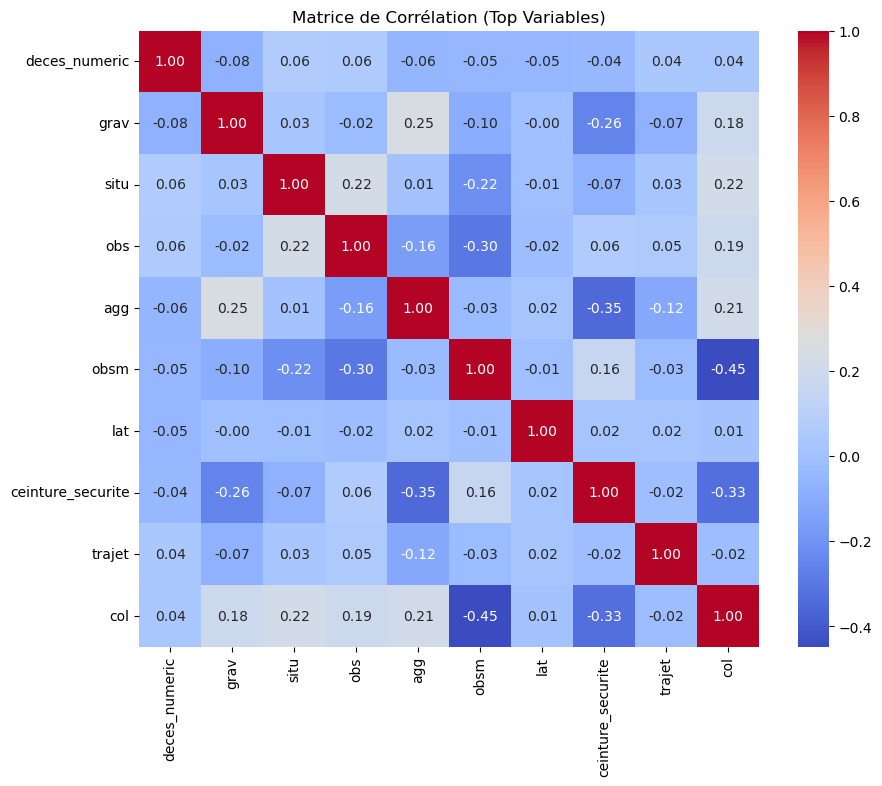

In [121]:
# Convertir la variable 'deces' en numérique
df['deces_numeric'] = df['deces'].astype(int)

# Sélectionner uniquement les colonnes numériques, y compris la nouvelle colonne 'deces_numeric'
df_numeric = df.select_dtypes(include=[np.number])

# Calcul de la matrice de corrélation
corr = df_numeric.corr()

# Filtrer pour ne garder que les corrélations avec la variable 'deces_numeric'
corr_deces = corr['deces_numeric'].sort_values(ascending=False)

# Sélectionner les variables les plus corrélées avec 'deces_numeric'
top_corr_vars = corr['deces_numeric'].abs().sort_values(ascending=False).index[:10]  # Top 10 variables
filtered_corr = corr.loc[top_corr_vars, top_corr_vars]

# Création d'une heatmap des variables les plus corrélées
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation (Top Variables)')
plt.show()
